In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import language_tool_python
tool = language_tool_python.LanguageTool('en-US')

text = "Your the best but their are allso  good!"
matches = tool.check(text)
len(matches)

4

In [3]:
from pptx import Presentation
from pptx.enum.shapes import MSO_SHAPE_TYPE

n=0
i=0
filename = 'test.pptx'
images=[]
page=[]
def write_image(shape):
    global n,i
    image = shape.image
    # ---get image "file" contents---
    image_bytes = image.blob
    # ---make up a name for the file, e.g. 'image.jpg'---
    image_filename = 'img/image{:03d}.{}'.format(n, image.ext)
    n += 1
    print(image_filename)
    page.append(image_filename)
    with open(image_filename, 'wb') as f:
        f.write(image_bytes)

def visitor(shape):
    if shape.shape_type == MSO_SHAPE_TYPE.GROUP:
        for s in shape.shapes:
            visitor(s)
    if shape.shape_type == MSO_SHAPE_TYPE.PICTURE:
        write_image(shape)

def iter_picture_shapes(prs):
    global i,page
    for slide in prs.slides:
        page=[]
        i+=1
        print(i)
        for shape in slide.shapes:
            visitor(shape)
        images.append(page)

iter_picture_shapes(Presentation(filename))
images

1
2
img/image000.png
img/image001.png
img/image002.png
img/image003.png
img/image004.png
3
4
img/image005.jpg


[[],
 ['img/image000.png',
  'img/image001.png',
  'img/image002.png',
  'img/image003.png',
  'img/image004.png'],
 [],
 ['img/image005.jpg']]

In [4]:
from pptx import Presentation

prs = Presentation(filename)

# text_runs will be populated with a list of strings,
# one for each text run in presentation
text_runs = []
# i=0
for slide in prs.slides:
#     i+=1
#     print(i)
    text1=[]
    for shape in slide.shapes:
        
        
        if not shape.has_text_frame:
            continue
        for paragraph in shape.text_frame.paragraphs:
            for run in paragraph.runs:
                text1.append(run.text)
    text_runs.append(text1)
text_runs

[['Project Speed Cycles Sri Lanka', 'Hero Experience Agency'],
 ['Our Team'],
 ['Purpose',
  '- ',
  'to find out issues with the current website and ',
  '- to provide recommendations',
  ' in order to rebuild the website to ',
  'increase sales',
  ' through the website '],
 ['There is cats']]

In [5]:
laplacian=0
for x ,y in zip(text_runs,images):
#     print(x,y)
    for k in x:
        print(k)
        print(tool.check(k))
    for k in y:
        print(k)
        img = cv2.imread(k) 
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        laplacian=cv2.Laplacian(gray, cv2.CV_64F)
        fm=laplacian.var()
        result = "Not Blurry"

        if fm < 100:
            result = "Blurry"
        print(result,fm)

Project Speed Cycles Sri Lanka
[]
Hero Experience Agency
[]
Our Team
[]
img/image000.png
Not Blurry 1298.8642254950346
img/image001.png
Not Blurry 1490.0164488611354
img/image002.png
Not Blurry 1504.4147008202476
img/image003.png
Not Blurry 2057.951858730446
img/image004.png
Not Blurry 1810.5483755674986
Purpose
[]
- 
[Match({'ruleId': 'DASH_RULE', 'message': 'Consider using an m-dash in dialogues and enumerations.', 'replacements': ['—'], 'offsetInContext': 0, 'context': '- ', 'offset': 0, 'errorLength': 1, 'category': 'PUNCTUATION', 'ruleIssueType': 'typographical', 'sentence': '-'})]
to find out issues with the current website and 
[Match({'ruleId': 'UPPERCASE_SENTENCE_START', 'message': 'This sentence does not start with an uppercase letter.', 'replacements': ['To'], 'offsetInContext': 0, 'context': 'to find out issues with the current websit...', 'offset': 0, 'errorLength': 2, 'category': 'CASING', 'ruleIssueType': 'typographical', 'sentence': 'to find out issues with the current 

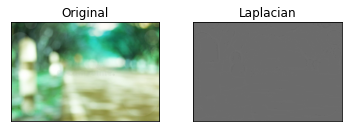

In [7]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)  # y

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()